In [1]:
#complete post processing: loss functions, test samples and statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

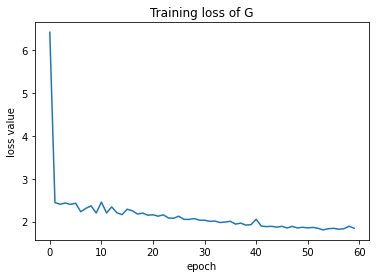

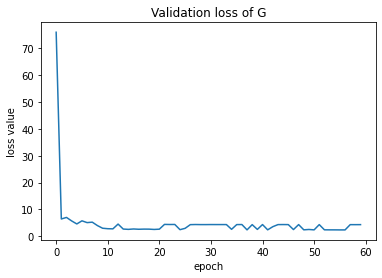

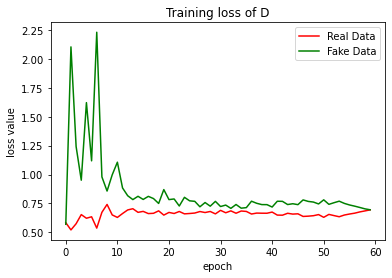

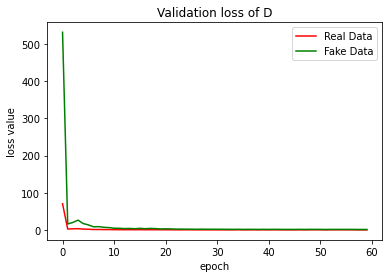

In [52]:
#plot the loss functions

#separate
common_dir='/vol/calvin/data/dbhatnagar/July23/PlotsJuly19/'
gen_loss_tr=np.load(common_dir +'train_loss_G.npy')
plt.plot(gen_loss_tr)
plt.title('Training loss of G')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()

gen_loss_val=np.load(common_dir +'val_loss_G.npy')
plt.plot(gen_loss_val)
plt.title('Validation loss of G')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()

disc_loss_real_tr=np.load(common_dir +'train_loss_D_real.npy')
disc_loss_fake_tr=np.load(common_dir +'train_loss_D_fake.npy')
plt.plot(disc_loss_real_tr,'r',label="Real Data")
plt.plot(disc_loss_fake_tr,'g',label="Fake Data")
plt.title('Training loss of D')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()

disc_loss_real_val=np.load(common_dir +'val_loss_D_real.npy')
disc_loss_fake_val=np.load(common_dir +'val_loss_D_fake.npy')
plt.plot(disc_loss_real_val,'r',label="Real Data")
plt.plot(disc_loss_fake_val,'g',label="Fake Data")
plt.title('Validation loss of D')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [2]:
#transformations
def log_transform(arr):
    a=4
    # Create a copy of the original array
    transformed_arr = np.copy(arr)
    
    # Add a constant offset to shift the values to a positive range
    transformed_arr += abs(np.min(transformed_arr)) + 1e-9
    
    # Apply the transformation equation to the array
    transformed_arr = (2 * transformed_arr / (transformed_arr + a)) - 1
    
    return transformed_arr

def log10_transform(arr):
  OG_arr=np.copy(arr)
  OG_arr=OG_arr + 1
  return np.log10(OG_arr)

def inverse_log_transform(arr):
  a=4
  # Create a copy of the original array
  in_transformed_arr = np.copy(arr)
  # Apply the in transformation equation to the array
  in_transformed_arr = (a * (1 + in_transformed_arr))/(1 -in_transformed_arr)
  return in_transformed_arr


In [7]:
data3=np.load(f'/vol/calvin/data/dbhatnagar/July_backup/July5_B/test/test_July5_B/initial_sample7.npy')
data3.shape

(1, 1, 128, 128, 128)

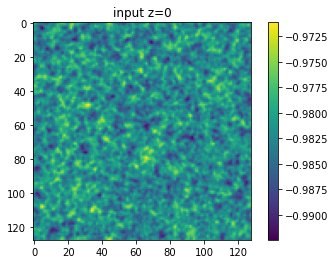

<Figure size 432x288 with 0 Axes>

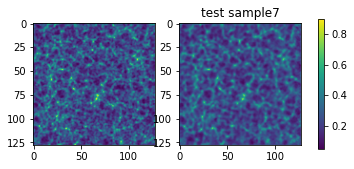

Correlation coefficient: 0.6196115113348947


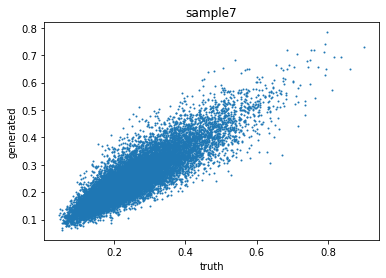

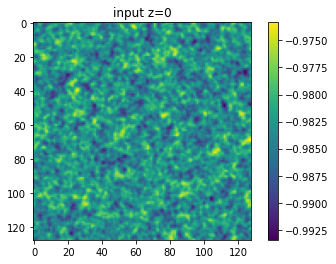

<Figure size 432x288 with 0 Axes>

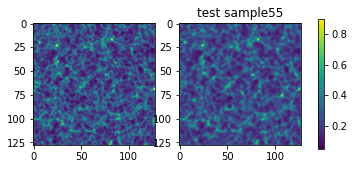

Correlation coefficient: 0.740747317242029


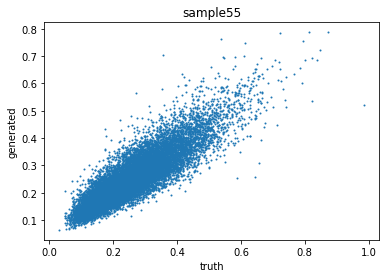

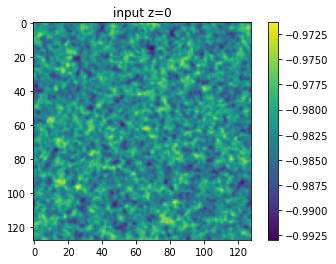

<Figure size 432x288 with 0 Axes>

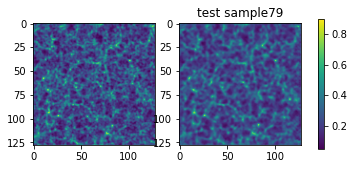

Correlation coefficient: 0.8195805960724207


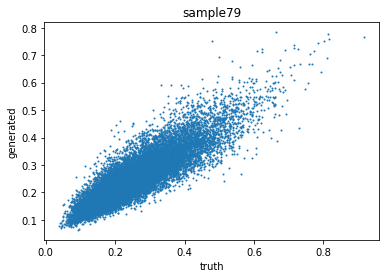

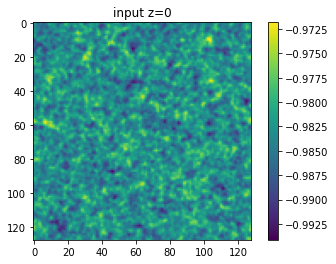

<Figure size 432x288 with 0 Axes>

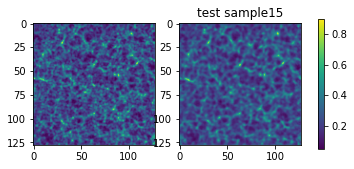

Correlation coefficient: 0.7112816992769215


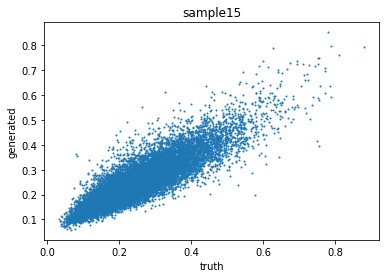

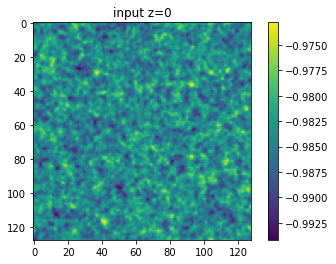

<Figure size 432x288 with 0 Axes>

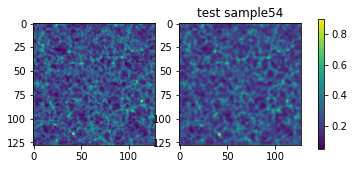

Correlation coefficient: 0.6850159324227069


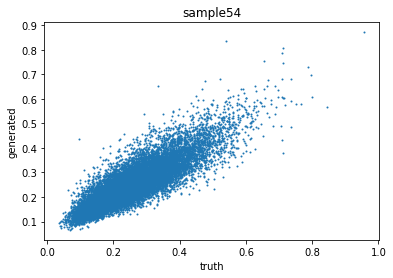

<Figure size 432x288 with 0 Axes>

In [54]:
#plots of samples
test_length=5 #number of test samples wanted
present_dir='/vol/calvin/data/dbhatnagar/Results_Summary/I_F_192epoch/test_July5_B/'
#present_dir='/vol/calvin/data/dbhatnagar/Results_Summary/F_I_45epoch/'
for i in range(0,test_length):
    p=random_int = np.random.randint(1, 100)

    data1=np.load(present_dir + f'ground_truth{p}.npy')  #truth NO need log trans 
    data2=np.load(present_dir +  f'generated_sample{p}.npy')  #generated: NO need log trans
    data3=np.load(present_dir + f'initial_sample{p}.npy') #initial or final: already log transformed
    #data1 = log_transform(data1)
    data1=inverse_log_transform(data1)
    data2=inverse_log_transform(data2)
    data1=log10_transform(data1)
    data2=log10_transform(data2)
    data1=data1.squeeze(0)
    data1=data1.squeeze(0)
    data3=data3.squeeze(0)
    data3=data3.squeeze(0)
    
    data1 = np.mean(data1[:,:,0:4], axis=2)
    data2 = np.mean(data2[:,:,0:4], axis=2)
    data3 = np.mean(data3[:,:,0:4], axis=2)
    if i==0:
        vmin = min(np.min(data1), np.min(data2))
        vmax = max(np.max(data1), np.max(data2))


    # Plot the third data
    #plt.figure()



    #im3 = ax3.imshow(data3, cmap='viridis')
    #cbar = fig.colorbar(im3, shrink=0.6)
    plt.imshow(data3,'viridis')
    plt.colorbar()
    plt.title('input z=0')
    plt.figure()

    #plot on same color bar
    fig, (ax1, ax2) = plt.subplots(1, 2)
   

# Plot the first data
    im1 = ax1.imshow(data1, cmap='viridis',vmin=vmin,vmax=vmax)
    

# Plot the second data
    im2 = ax2.imshow(data2, cmap='viridis',vmin=vmin,vmax=vmax)

    
    

# Create a common colorbar
    cbar = fig.colorbar(im2,ax=[ax1, ax2], shrink=0.6)
    plt.title(f'test sample{p}')

# Display the plots
    #plt.imshow(vmin=vmin_,vmax=vmax_)
    plt.show()
    plt.figure()

    plt.scatter(data1, data2,s=1)
    correlation_coefficient = np.corrcoef(data1, data2)[0, 1]

# Print the correlation coefficient
    print("Correlation coefficient:", correlation_coefficient)

# Set axis labels
    plt.xlabel('truth')
    plt.ylabel('generated')
    plt.title(f'sample{p}')
    plt.figure()

In [57]:
#statistics measure

#plots
test_length=100  #number of test samples
corr_coeff=[]    #linear correlation coefficient of each pair
i=0
rho1=[]         #non-linear 
pvalue1=[]
rho=0
p_value=0
div1=[]         
sub1=[]
sq1=[]
val_sub=0  
val_div=0
val_sq=0


for i in range(0,test_length):
  #p=i
  #p=random_int = np.random.randint(0, 100)
  data1=np.load(present_dir + f'ground_truth{p}.npy')  #truth
  data2=np.load(present_dir + f'generated_sample{p}.npy')  #generated
 
  
  #data1 = log_transform(data1)
  #data2 = log_transform(data2)
    #data2=inverse_log_transform(data2)
    #data1=log10_transform(data1)
    #data2=log10_transform(data2)
  data1=data1.squeeze(0)
  data1=data1.squeeze(0)
  # data2=data2.squeeze(0)
  # data2=data2.squeeze(0)
    
  data1 = np.mean(data1[:,:,0:4], axis=2)
  data2 = np.mean(data2[:,:,0:4], axis=2)
  correlation_coefficient = np.corrcoef(data1, data2)[0, 1]
  corr_coeff.append(correlation_coefficient)
  rho, p_value = spearmanr(data1, data2)
  rho1.append(rho)
  pvalue1.append(p_value)
  val_div=data1/data2
  val_sub=data1-data2
  val_sq=(data1**2)-(data2**2)
  div1.append(val_div)
  sub1.append(val_sub)
  sq1.append(val_sq)

print(np.mean(div1),'div')
print(np.mean(sub1),'sub')
print(np.mean(sq1),'sq')
print("Spearman's rank correlation coefficient:", np.mean(rho1))
print("p-value:", np.mean(pvalue1))
print("Correlation coefficient:", np.mean(corr_coeff))

   

0.9880066 div
0.0077719544 sub
-0.0043385774 sq
Spearman's rank correlation coefficient: 0.023174367442582455
p-value: 0.3279601286157856
Correlation coefficient: 0.6811104814261647
